#### EMACS LISP STUFF PLEASE IGNORE
(defun switch-to-notebook ()
 (interactive)
 (st-toggle-to-buffer "*ein: http://127.0.0.1:8899/make_figs.ipynb*"))

In [1]:
%pylab inline
import os,sys
from importlib import reload
from copy import deepcopy
plt.style.use("default")
plt.rcParams["figure.figsize"] = (8,3)
import pickle

Populating the interactive namespace from numpy and matplotlib


In [2]:
import units; reload(units); UNITS = units.UNITS
from boulder import concs2rgb
import crick; reload(crick)
import fisher_plumes_tools as fpt;      reload(fpt)
import fisher_plumes_figs  as fpf;      reload(fpf);
import fisher_plumes_fig_tools as fpft; reload(fpft)
import fisher_plumes as fp;             reload(fp)
FisherPlumes = fp.FisherPlumes
crick.logger.setLevel(logging.DEBUG)

load_which = "bw"
read_from_file = True
probe_locs = [(x,y) for y in [0.1,0.3,0.5,0.7,0.9] for x in [0.45,0.35,0.25,0.15]]

if not read_from_file:
    n_bootstraps = 10

    pairs_mode = "unsigned"
    if load_which == "bw":
        F = FisherPlumes("boulder16", pitch = 25000 * UNITS.um,  freq_max = 20 * UNITS.hertz,
                           which_coords = probe_locs*UNITS.m,
                           py_mode = "relative",
                           suffix='manuscript',
                         pairs_mode = pairs_mode, n_bootstraps = n_bootstraps, random_seed = 0)
    else:
        F = FisherPlumes("n12dishT",  pitch = 76000 * UNITS.um, freq_max = 100 * UNITS.hertz,
                       which_coords = [(1.0, 0.5),
                                       #(0.9,0.5),
                                       (0.7,0.5),
                                       #(0.6,0.5)
                                       ]*UNITS.m,
                       pairs_mode = pairs_mode, n_bootstraps = n_bootstraps, random_seed = 0)
    data = {
        load_which:F,
    }

    with open(f"data_{load_which}.p", "wb") as f:
        pickle.dump(data, f)
else:
    if load_which == "bw":
        name = "boulder16"
        pitch = 25000 * UNITS.um
    else:
        name = "n12dishT"
        pitch = 76000 * UNITS.um
        
    units.pint.set_application_registry(UNITS)
    UNITS.define(f"{name}_pitch = {pitch}")    
    data_file = f"data_{load_which}.p"
    with open(data_file, "rb") as f:
        print(f"Loading from {data_file=}.")
        data = pickle.load(f)

INFO:boulder:Boulder simulation data available for:


INFO:boulder:Re100_0_5mm_50Hz_16source_manuscript.h5         : ['Odor Data/c1a', 'Odor Data/c1b', 'Odor Data/c2a', 'Odor Data/c2b', 'Odor Data/c3a', 'Odor Data/c3b', 'Odor Data/c4a', 'Odor Data/c4b', 'Odor Data/c5a', 'Odor Data/c5b', 'Odor Data/c6a', 'Odor Data/c6b', 'Odor Data/c7a', 'Odor Data/c7b', 'Odor Data/c8a', 'Odor Data/c8b'] (16 datasets)


INFO:crick:Simulation data available for:


INFO:crick:ff_int_sym_slow_high_tres_wide_n12dishT         : Y0.450 - Y0.550 (11 datasets)


INFO:crick:Simulation data available for:


INFO:crick:ff_int_sym_slow_high_tres_wide_n12dishT         : Y0.450 - Y0.550 (11 datasets)


Loading from data_file='data_bw.p'.


# Compute all statistics 

In [3]:
# Which window sizes to compute the statistics for
wnd_sec_vals = [0.5 * UNITS.s, 1 * UNITS.s, 2 * UNITS.s, 4 * UNITS.s]

In [4]:
dmax_um = {"bw":np.inf, "cr":np.inf}
data_wnd = {}
for wnd_sec in wnd_sec_vals:
    wnd = {k:int(F.fs*wnd_sec) for k, F in data.items()}
    istart = {k:0 if k[0] == "b" else 1000 for k, F in data.items()} 
    [(print(k, end = ""),
      sys.stdout.flush(),
      F.compute_all_for_window(wnd = wnd[k],
                               istart = istart[k],
                               window = 'boxcar',
                               tukey_param = 0,
                               dmax_um = dmax_um[k],
                               fit_vars = False,
                               weighting_freq_max = (7 if k == "bw" else 70) * UNITS.Hz,
                               )
      ) for k, F in data.items() if k != "acr"];
    data_wnd[wnd_sec] = deepcopy(data)

bw

           fisher_plumes 2023/05/03 00:59:00     INFO: Window set to self.wnd=25.


           fisher_plumes 2023/05/03 00:59:00     INFO: Computing trig coefficients for boulder16 with istart=0 and tukey_param=0 and kwargs={'window': 'boxcar'}


           fisher_plumes 2023/05/03 00:59:00     INFO: Computing coefficients for 20 probes.


           fisher_plumes 2023/05/03 00:59:01     INFO: Computing variances for harmonics.


           fisher_plumes 2023/05/03 00:59:01     INFO: Computing correlations from trig coefficients.


           fisher_plumes 2023/05/03 00:59:02     INFO: Computing lambdas.


           fisher_plumes 2023/05/03 00:59:02    DEBUG: sum(freqs<=fmax)=13.


           fisher_plumes 2023/05/03 00:59:02    DEBUG: data.shape=(11, 2, 7328)


           fisher_plumes 2023/05/03 00:59:02    DEBUG: vars.shape=(2, 11)


           fisher_plumes 2023/05/03 00:59:11    DEBUG: utils.d1(self.la[0]).shape=(11, 13)


           fisher_plumes 2023/05/03 00:59:11     INFO: Computing p-values.


           fisher_plumes 2023/05/03 00:59:11     INFO: (Skipping p-value computation for bootstraps.)


           fisher_plumes 2023/05/03 00:59:27     INFO: Computing R^2-values.


           fisher_plumes 2023/05/03 00:59:27     INFO: (Skipping R^2-value computation for bootstraps.)


           fisher_plumes 2023/05/03 00:59:28     INFO: Computing generalized exponential fit to distance.


           fisher_plumes 2023/05/03 00:59:28     INFO: Using 16 distances <= inf um 


           fisher_plumes 2023/05/03 00:59:28     INFO: Computed λ for 13 frequencies and 16 distances and 11 bootstraps.


           fisher_plumes 2023/05/03 00:59:28     INFO: Not fitting amplitudes, instead using given values.


           fisher_plumes 2023/05/03 00:59:42    DEBUG: self.fit_params[0].shape=(11, 13, 3).


           fisher_plumes 2023/05/03 00:59:42    DEBUG: self.vars_for_freqs[0].shape=(11, 13).


           fisher_plumes 2023/05/03 00:59:42     INFO: Computing Fisher information (v2).


           fisher_plumes 2023/05/03 00:59:42     INFO: Evaluating at distances: [100, 200, 500, 1000, 2000, 5000, 7500, 15000, 22500, 30000, 37500, 45000, 52500, 60000, 67500, 75000, 82500, 90000, 97500, 105000, 112500].


           fisher_plumes 2023/05/03 00:59:42    DEBUG: self.I[0].shape=(11, 13, 21) has the expected value.


           fisher_plumes 2023/05/03 00:59:42     INFO: Done computing all for wnd=25.


bw

           fisher_plumes 2023/05/03 00:59:43     INFO: Window set to self.wnd=50.


           fisher_plumes 2023/05/03 00:59:43     INFO: Computing trig coefficients for boulder16 with istart=0 and tukey_param=0 and kwargs={'window': 'boxcar'}


           fisher_plumes 2023/05/03 00:59:43     INFO: Computing coefficients for 20 probes.


           fisher_plumes 2023/05/03 00:59:43     INFO: Computing variances for harmonics.


           fisher_plumes 2023/05/03 00:59:43     INFO: Computing correlations from trig coefficients.


           fisher_plumes 2023/05/03 00:59:44     INFO: Computing lambdas.


           fisher_plumes 2023/05/03 00:59:44    DEBUG: sum(freqs<=fmax)=26.


           fisher_plumes 2023/05/03 00:59:44    DEBUG: data.shape=(11, 2, 3808)


           fisher_plumes 2023/05/03 00:59:44    DEBUG: vars.shape=(2, 11)


           fisher_plumes 2023/05/03 00:59:54    DEBUG: utils.d1(self.la[0]).shape=(11, 26)


           fisher_plumes 2023/05/03 00:59:54     INFO: Computing p-values.


           fisher_plumes 2023/05/03 00:59:54     INFO: (Skipping p-value computation for bootstraps.)


           fisher_plumes 2023/05/03 01:00:10     INFO: Computing R^2-values.


           fisher_plumes 2023/05/03 01:00:10     INFO: (Skipping R^2-value computation for bootstraps.)


           fisher_plumes 2023/05/03 01:00:12     INFO: Computing generalized exponential fit to distance.


           fisher_plumes 2023/05/03 01:00:12     INFO: Using 16 distances <= inf um 


           fisher_plumes 2023/05/03 01:00:12     INFO: Computed λ for 26 frequencies and 16 distances and 11 bootstraps.


           fisher_plumes 2023/05/03 01:00:12     INFO: Not fitting amplitudes, instead using given values.


           fisher_plumes 2023/05/03 01:00:29    DEBUG: self.fit_params[0].shape=(11, 26, 3).


           fisher_plumes 2023/05/03 01:00:29    DEBUG: self.vars_for_freqs[0].shape=(11, 26).


           fisher_plumes 2023/05/03 01:00:29     INFO: Computing Fisher information (v2).


           fisher_plumes 2023/05/03 01:00:29     INFO: Evaluating at distances: [100, 200, 500, 1000, 2000, 5000, 7500, 15000, 22500, 30000, 37500, 45000, 52500, 60000, 67500, 75000, 82500, 90000, 97500, 105000, 112500].


           fisher_plumes 2023/05/03 01:00:29    DEBUG: self.I[0].shape=(11, 26, 21) has the expected value.


           fisher_plumes 2023/05/03 01:00:29     INFO: Done computing all for wnd=50.


bw

           fisher_plumes 2023/05/03 01:00:30     INFO: Window set to self.wnd=100.


           fisher_plumes 2023/05/03 01:00:30     INFO: Computing trig coefficients for boulder16 with istart=0 and tukey_param=0 and kwargs={'window': 'boxcar'}


           fisher_plumes 2023/05/03 01:00:30     INFO: Computing coefficients for 20 probes.


           fisher_plumes 2023/05/03 01:00:30     INFO: Computing variances for harmonics.


           fisher_plumes 2023/05/03 01:00:31     INFO: Computing correlations from trig coefficients.


           fisher_plumes 2023/05/03 01:00:32     INFO: Computing lambdas.


           fisher_plumes 2023/05/03 01:00:32    DEBUG: sum(freqs<=fmax)=51.


           fisher_plumes 2023/05/03 01:00:32    DEBUG: data.shape=(11, 2, 1888)


           fisher_plumes 2023/05/03 01:00:32    DEBUG: vars.shape=(2, 11)


           fisher_plumes 2023/05/03 01:00:43    DEBUG: utils.d1(self.la[0]).shape=(11, 51)


           fisher_plumes 2023/05/03 01:00:43     INFO: Computing p-values.


           fisher_plumes 2023/05/03 01:00:43     INFO: (Skipping p-value computation for bootstraps.)


           fisher_plumes 2023/05/03 01:00:59     INFO: Computing R^2-values.


           fisher_plumes 2023/05/03 01:00:59     INFO: (Skipping R^2-value computation for bootstraps.)


           fisher_plumes 2023/05/03 01:01:01     INFO: Computing generalized exponential fit to distance.


           fisher_plumes 2023/05/03 01:01:01     INFO: Using 16 distances <= inf um 


           fisher_plumes 2023/05/03 01:01:01     INFO: Computed λ for 51 frequencies and 16 distances and 11 bootstraps.


           fisher_plumes 2023/05/03 01:01:01     INFO: Not fitting amplitudes, instead using given values.


           fisher_plumes 2023/05/03 01:01:28    DEBUG: self.fit_params[0].shape=(11, 51, 3).


           fisher_plumes 2023/05/03 01:01:28    DEBUG: self.vars_for_freqs[0].shape=(11, 51).


           fisher_plumes 2023/05/03 01:01:28     INFO: Computing Fisher information (v2).


           fisher_plumes 2023/05/03 01:01:28     INFO: Evaluating at distances: [100, 200, 500, 1000, 2000, 5000, 7500, 15000, 22500, 30000, 37500, 45000, 52500, 60000, 67500, 75000, 82500, 90000, 97500, 105000, 112500].


/nemo/lab/schaefera/working/tootoos/git/fisher-plumes/fisher_plumes_tools.py:158: RuntimeWarning: divide by zero encountered in true_divide
  return coef * num1 / den1 / den2
           fisher_plumes 2023/05/03 01:01:28    DEBUG: self.I[0].shape=(11, 51, 21) has the expected value.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/numpy/lib/function_base.py:4488: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))
           fisher_plumes 2023/05/03 01:01:29     INFO: Done computing all for wnd=100.


bw

           fisher_plumes 2023/05/03 01:01:30     INFO: Window set to self.wnd=200.


           fisher_plumes 2023/05/03 01:01:30     INFO: Computing trig coefficients for boulder16 with istart=0 and tukey_param=0 and kwargs={'window': 'boxcar'}


           fisher_plumes 2023/05/03 01:01:30     INFO: Computing coefficients for 20 probes.


           fisher_plumes 2023/05/03 01:01:30     INFO: Computing variances for harmonics.


           fisher_plumes 2023/05/03 01:01:30     INFO: Computing correlations from trig coefficients.


           fisher_plumes 2023/05/03 01:01:31     INFO: Computing lambdas.


           fisher_plumes 2023/05/03 01:01:31    DEBUG: sum(freqs<=fmax)=101.


           fisher_plumes 2023/05/03 01:01:32    DEBUG: data.shape=(11, 2, 928)


           fisher_plumes 2023/05/03 01:01:32    DEBUG: vars.shape=(2, 11)


           fisher_plumes 2023/05/03 01:01:46    DEBUG: utils.d1(self.la[0]).shape=(11, 101)


           fisher_plumes 2023/05/03 01:01:46     INFO: Computing p-values.


           fisher_plumes 2023/05/03 01:01:46     INFO: (Skipping p-value computation for bootstraps.)


           fisher_plumes 2023/05/03 01:02:09     INFO: Computing R^2-values.


           fisher_plumes 2023/05/03 01:02:09     INFO: (Skipping R^2-value computation for bootstraps.)


           fisher_plumes 2023/05/03 01:02:12     INFO: Computing generalized exponential fit to distance.


           fisher_plumes 2023/05/03 01:02:12     INFO: Using 16 distances <= inf um 


           fisher_plumes 2023/05/03 01:02:12     INFO: Computed λ for 101 frequencies and 16 distances and 11 bootstraps.


           fisher_plumes 2023/05/03 01:02:12     INFO: Not fitting amplitudes, instead using given values.


           fisher_plumes 2023/05/03 01:02:57    DEBUG: self.fit_params[0].shape=(11, 101, 3).


           fisher_plumes 2023/05/03 01:02:57    DEBUG: self.vars_for_freqs[0].shape=(11, 101).


           fisher_plumes 2023/05/03 01:02:57     INFO: Computing Fisher information (v2).


           fisher_plumes 2023/05/03 01:02:57     INFO: Evaluating at distances: [100, 200, 500, 1000, 2000, 5000, 7500, 15000, 22500, 30000, 37500, 45000, 52500, 60000, 67500, 75000, 82500, 90000, 97500, 105000, 112500].


           fisher_plumes 2023/05/03 01:02:58    DEBUG: self.I[0].shape=(11, 101, 21) has the expected value.


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/numpy/lib/function_base.py:4489: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t >= 0.5)


/nemo/lab/schaefera/working/tootoos/git/fisher-plumes/fisher_plumes.py:348: RuntimeWarning: invalid value encountered in true_divide
  self.I_weighted_freqs = [Ifi/Isi for Ifi, Isi in zip(Ifreqs, Isum)]
           fisher_plumes 2023/05/03 01:02:58     INFO: Done computing all for wnd=200.


# Sensitivity plot

In [5]:
SAVEPLOTS = True # Whether to actually make the plots

In [11]:
fig_dir = "figs"
if not os.path.exists(fig_dir):
    print(f"Creating {fig_dir=}")
    os.system(f"mkdir -p {fig_dir}")
else:
    print(f"{fig_dir=} already exists.")

fig_dir='figs' already exists.


In [7]:
k = "bw"
F = data[k]

In [12]:
t_snapshot = 40 * UNITS.sec # Which snapshot to use as an example plume
data_dir = os.path.join(os.environ["FISHER_PLUMES_DATA"], {"bw":"boulder", "cr":"crick"}[k], "saved-snapshots")
mean_subtract_y_coords = True
to_pitch = lambda x: x.to(UNITS(F.pitch_units)).magnitude

In [13]:
coords = [(to_pitch(x), to_pitch(y)) for (x,y) in F.sim0.get_used_probe_coords()]

INFO:boulder:Loading fld='c1a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c1a_t40.p'.


INFO:boulder:Loading fld='c1b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c1b_t40.p'.


INFO:boulder:Loading fld='c2a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c2a_t40.p'.


INFO:boulder:Loading fld='c2b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c2b_t40.p'.


INFO:boulder:Loading fld='c3a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c3a_t40.p'.


INFO:boulder:Loading fld='c3b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c3b_t40.p'.


INFO:boulder:Loading fld='c4a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c4a_t40.p'.


INFO:boulder:Loading fld='c4b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c4b_t40.p'.


INFO:boulder:Loading fld='c5a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c5a_t40.p'.


INFO:boulder:Loading fld='c5b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c5b_t40.p'.


INFO:boulder:Loading fld='c6a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c6a_t40.p'.


INFO:boulder:Loading fld='c6b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c6b_t40.p'.


INFO:boulder:Loading fld='c7a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c7a_t40.p'.


INFO:boulder:Loading fld='c7b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c7b_t40.p'.


INFO:boulder:Loading fld='c8a' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c8a_t40.p'.


INFO:boulder:Loading fld='c8b' at t=40 from full_file='/camp/home/tootoos/working/tootoos/data/fisher-plumes/boulder/saved-snapshots/c8b_t40.p'.


Wrote figs/sensitivity.pdf.


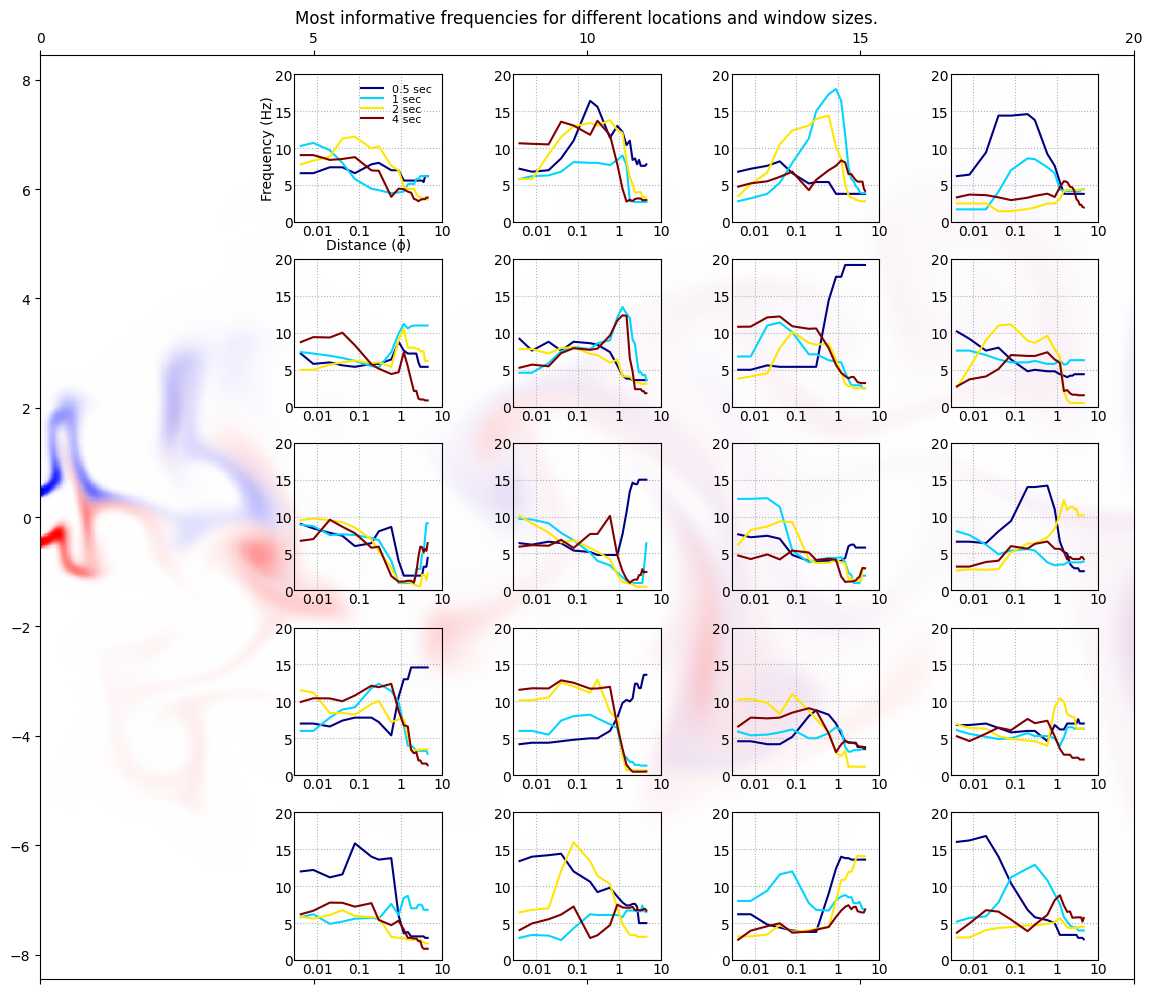

In [14]:
fields = F.load_saved_snapshots(t = t_snapshot.to(UNITS.sec).magnitude, data_dir = data_dir)
figure(figsize=(16,12))
which_keys = [-3750,3750]
pp = concs2rgb(fields[which_keys[0]], fields[which_keys[1]])
dy = (F.sim0.y_lim[1] + F.sim0.y_lim[0])/2 if mean_subtract_y_coords else 0
extent = [to_pitch(x) for x in F.sim0.x_lim] + [to_pitch(y - dy) for y in F.sim0.y_lim]
dx = extent[1] - extent[0]
dy = extent[3] - extent[2]
matshow(pp, extent = extent, fignum=False)
ax = gca()
m = np.array([[mean(I.magnitude,axis=0) for I in data_wnd[w]["bw"].I_best_freqs] for w in wnd_sec_vals]).transpose([1,0,2])
axi = []
aw = 2.7
for i, (mi, (x,y)) in enumerate(zip(m, coords)):
    axi.append(ax.inset_axes(bounds=[(x - extent[0] - aw/2)/dx, (y - extent[2]-aw/2)/dy, aw/dx,aw/dy]))
    for ii, mii in enumerate(mi[0:]):
        axi[-1].plot(log10(F.I_dists/F.pitch.magnitude), mii, color=cm.jet((ii)/3.), label=f"{wnd_sec_vals[ii].magnitude:g} sec"
                    )
       
    axi[-1].set_ylim(0,20)
    xt = log10([0.01,0.1,1,10])
    yt = [0,5,10,15,20]
    axi[-1].set_xticks(xt)
    axi[-1].set_yticks(yt)
    if False and (i != len(coords)-1):
        axi[-1].set_xticklabels([])
        axi[-1].set_yticklabels([])
    else:
        axi[-1].set_xticklabels([f"{10**xti:g}" for xti in xt], fontsize=10)
        axi[-1].set_yticklabels([f"{yti:g}" for yti in yt], fontsize=10)
        axi[-1].tick_params(axis="both", pad=-2)
    if i==len(coords)-1:
        axi[-1].set_xlabel("Distance (ϕ)", fontsize=10,labelpad=0)
        axi[-1].set_ylabel("Frequency (Hz)", fontsize=10,labelpad=0)
        axi[-1].legend(frameon=False,labelspacing=0,fontsize=8)
        
    axi[-1].grid(True, linestyle=":")
    axi[-1].patch.set_alpha(0.)
    axi[-1].xaxis.set_tick_params(width=0); axi[-1].yaxis.set_tick_params(width=0)
    #[axi[-1].spines[u].set_visible(False) for u in ["top","right"]]
title("Most informative frequencies for different locations and window sizes.")
file_name = f"figs/sensitivity.pdf"
SAVEPLOTS and (savefig(file_name, bbox_inches='tight'), print(f"Wrote {file_name}."));
